In [1]:
import json
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import numpy as np

In [2]:
# The original image unedited
Image(url= "original.svg")

In [3]:
# Images with bookend data removed
Image(url= "no_bookends.svg")

In [4]:
# Load the data from json format (cleaned up from XML)
with open('data.json', 'r') as f:
    data = json.load(f)
    
# Number of data points
data_points_count = len(data)

# Normalize the data
for circle in data:
    circle.update((k, int((v-3)/11)) for k, v in circle.items() if k == 'x')
    circle.update((k, int((v-3)/8)) for k, v in circle.items() if k == 'y')   

# Unique colors
unique_colors = set(circle['color'] for circle in data)

# Unique x
unique_x = sorted(set(circle['x'] for circle in data))

# Unique y
unique_y = sorted(set(circle['y'] for circle in data))

# Count of circles per color
color_counts = Counter(circle['color'] for circle in data)
# color_counts = sorted(color_counts.items(), key=lambda t: t[1], reverse=True)

print('\nCircles:     {}\n'.format(data_points_count))
print('Colors:      {}\n'.format('    '.join([color for color in unique_colors])))
print('Columns:     ' + str(len(unique_x)))
print('Rows:        ' + str(len(unique_y)))
print('\nColor Counts:\n')
for color in color_counts:
    count = color_counts[color]
    print("{} ({})".format(color, count))


Circles:     567

Colors:      #99CEFF    #F9FAFB    #D0B8FB    #FAD9E7    #49B882    #E365A6    #FCC89B    #98CFAC

Columns:     94
Rows:        19

Color Counts:

#99CEFF (6)
#E365A6 (13)
#F9FAFB (26)
#FCC89B (1)
#98CFAC (11)
#D0B8FB (1)
#FAD9E7 (6)
#49B882 (503)


In [5]:
dots_per_column = Counter(circle['x'] for circle in data)
dots_per_row = Counter(circle['y'] for circle in data)

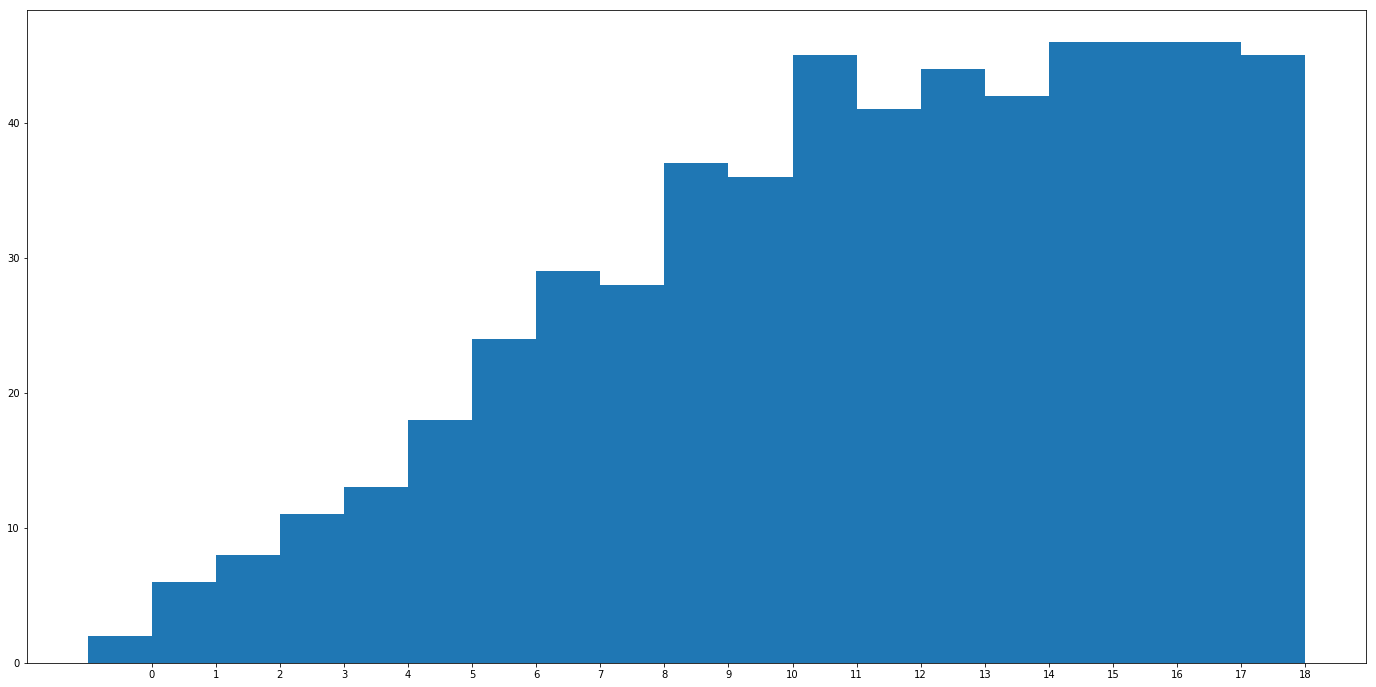

In [6]:
labels, values = zip(*dots_per_row.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24, 12))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

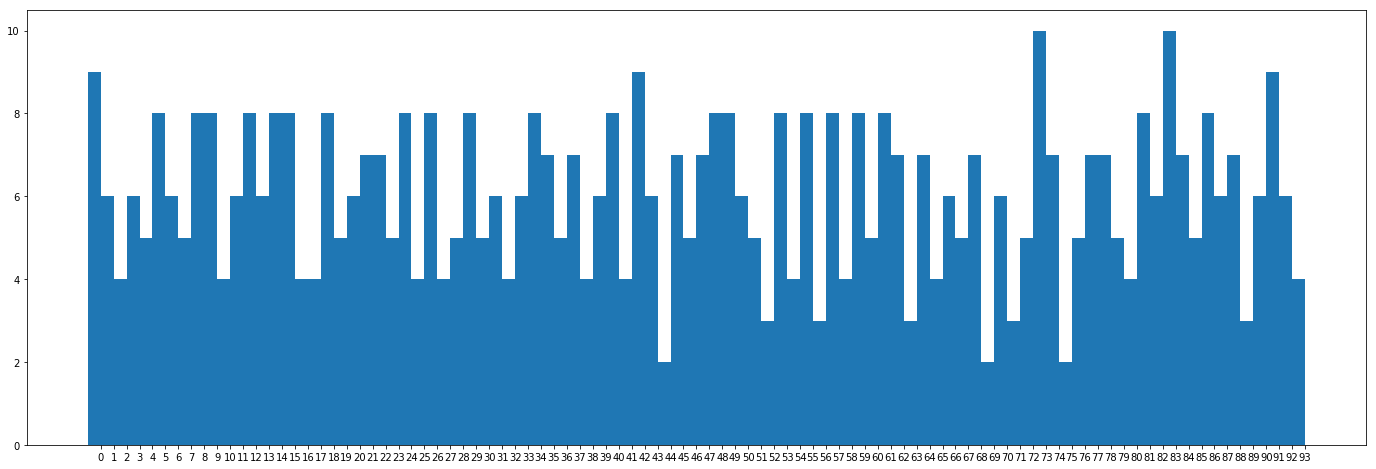

In [7]:
labels, values = zip(*dots_per_column.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24,8))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [8]:
color_circles = [circle for circle in data if circle['color'] != "#49B882"]
unique_color_x = set(circle['x'] for circle in color_circles)

color_circle_columns = []
for j in unique_color_x:
    color_circle_columns.append([circle for circle in data if circle['x'] == j])

dots_per_color_column = Counter(circle['x'] for circle in color_circles)
dots_per_color_row = Counter(circle['y'] for circle in color_circles)

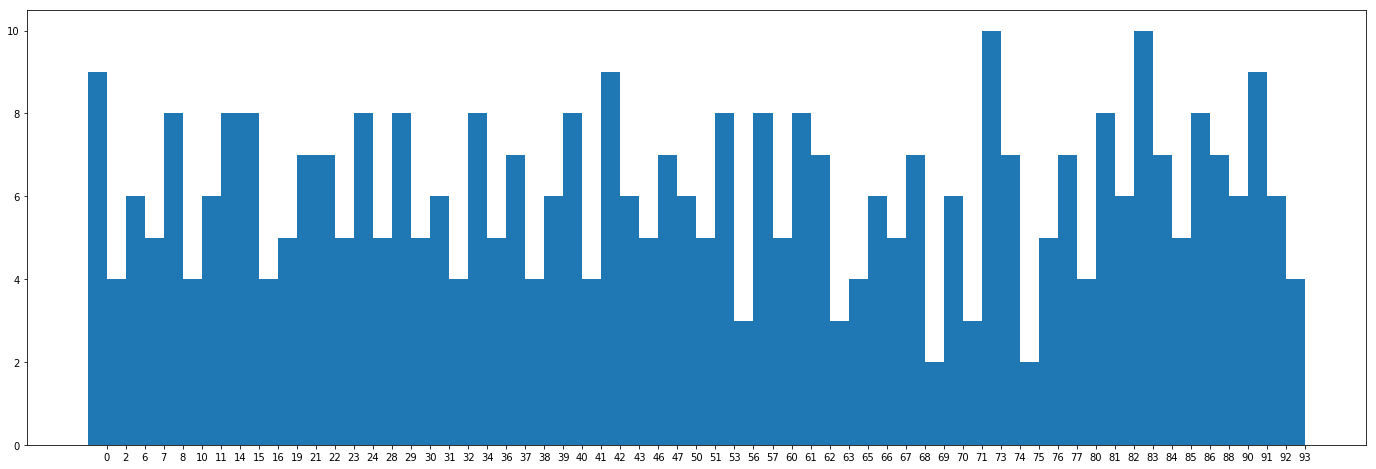

In [9]:
flat_list = [circle for column in color_circle_columns for circle in column]
dots_per_color_column = Counter(circle['x'] for circle in flat_list)
dots_per_color_row = Counter(circle['y'] for circle in flat_list)

labels, values = zip(*dots_per_color_column.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24,8))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

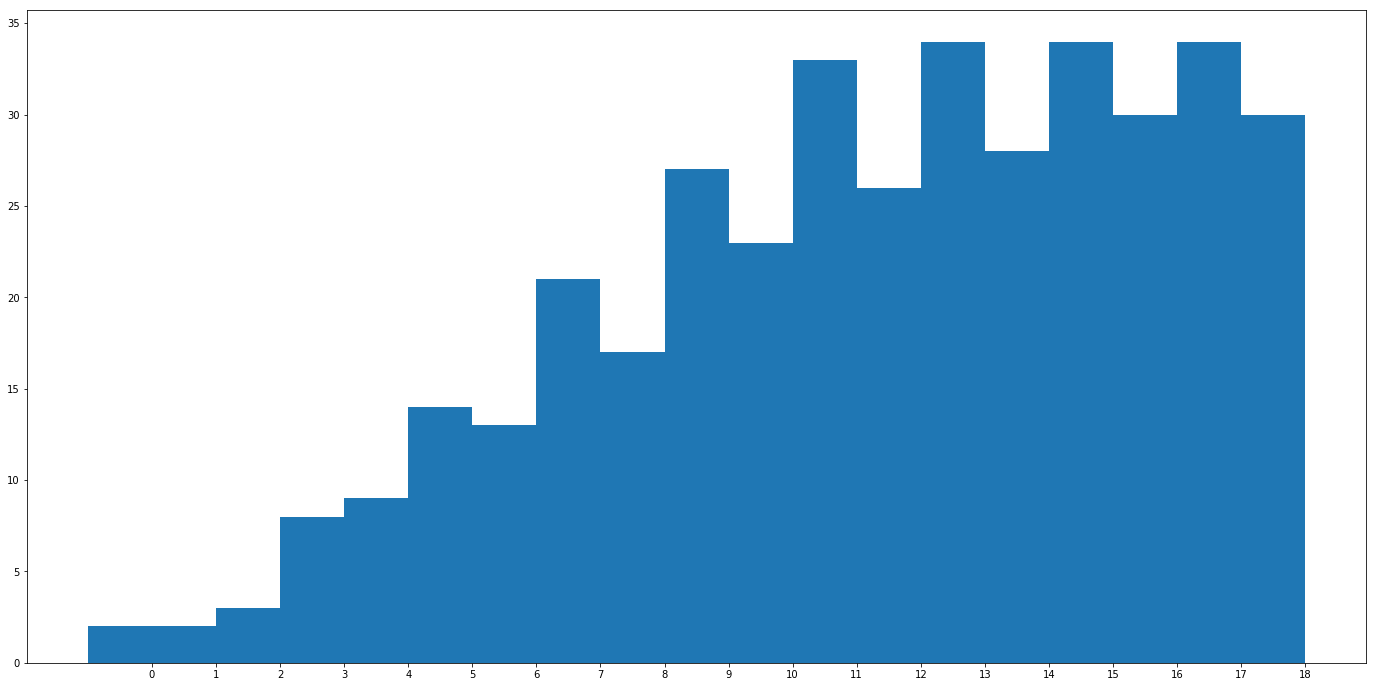

In [10]:
labels, values = zip(*dots_per_color_row.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(24, 12))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [27]:
non_color_circles = []
non_color_circles.append([circle for circle in data if circle['x'] != 0])

# for k in unique_color_x:
#     non_color_circles.append([circle for circle in data if circle['x'] != k])
    
print(non_color_circles)
    
# flat_list = [circle for column in non_color_circles for circle in column]
# dots_per_color_column = Counter(circle['x'] for circle in flat_list)
# dots_per_color_row = Counter(circle['y'] for circle in flat_list)

# labels, values = zip(*dots_per_color_column.items())

# indexes = np.arange(len(labels))
# width = 1

# plt.figure(figsize=(24,8))
# plt.bar(indexes, values, width)
# plt.xticks(indexes + width * 0.5, labels)
# plt.show()

[[{'color': '#49B882', 'x': 1, 'y': 16}, {'color': '#49B882', 'x': 1, 'y': 14}, {'color': '#49B882', 'x': 1, 'y': 12}, {'color': '#49B882', 'x': 1, 'y': 10}, {'color': '#49B882', 'x': 1, 'y': 8}, {'color': '#49B882', 'x': 1, 'y': 6}, {'color': '#49B882', 'x': 2, 'y': 17}, {'color': '#E365A6', 'x': 2, 'y': 15}, {'color': '#49B882', 'x': 2, 'y': 13}, {'color': '#49B882', 'x': 2, 'y': 11}, {'color': '#49B882', 'x': 3, 'y': 18}, {'color': '#49B882', 'x': 3, 'y': 16}, {'color': '#49B882', 'x': 3, 'y': 14}, {'color': '#49B882', 'x': 3, 'y': 12}, {'color': '#49B882', 'x': 3, 'y': 8}, {'color': '#49B882', 'x': 3, 'y': 6}, {'color': '#49B882', 'x': 4, 'y': 17}, {'color': '#49B882', 'x': 4, 'y': 15}, {'color': '#49B882', 'x': 4, 'y': 11}, {'color': '#49B882', 'x': 4, 'y': 9}, {'color': '#49B882', 'x': 4, 'y': 7}, {'color': '#49B882', 'x': 5, 'y': 18}, {'color': '#49B882', 'x': 5, 'y': 16}, {'color': '#49B882', 'x': 5, 'y': 14}, {'color': '#49B882', 'x': 5, 'y': 12}, {'color': '#49B882', 'x': 5, 